# Моделирование силовых линий электрического поля двух точечных зарядов вблизи проводящей плоскости.
  ## Задание для вычислительного эксперимента:
  * построить силовые линии электрического поля для разных сочетаний знаков зарядов в случае равноудалённости зарядов друг от друга и от плоскости;
  * наложить на изображение силовых линий вблизи плоскости график распределения поверхностной плотности заряда на плоскости.

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm
from scipy.constants import e
from scipy.constants import epsilon_0
import math
plt.rcParams['text.usetex'] = True
plt.style.use('Solarize_Light2')
file = 'fig.pdf'
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,}

plt.rc('font', **font)


$$\vec{E}(\vec{r})=\dfrac{q(x_q-x_r)}{\rho(q, r_0)}

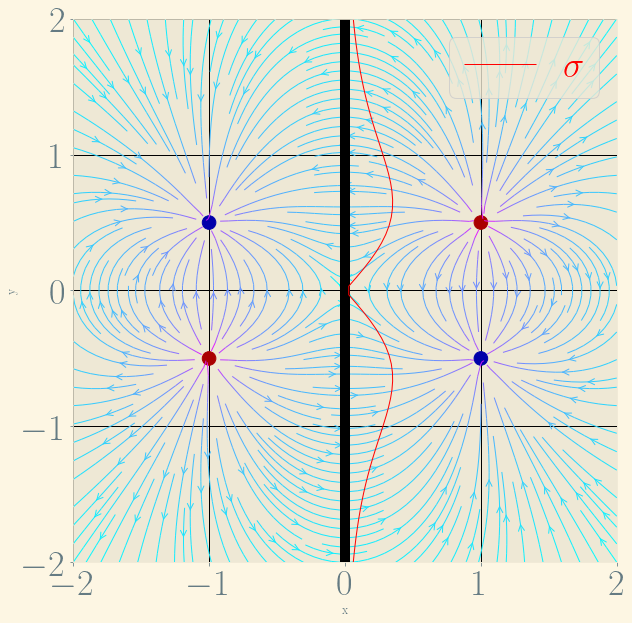

In [261]:


def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den


# def sigma(q, r0, x, y):
#     ex, ey = E(q, r0, x, y)
#     sheesh = np.linalg.norm(np.array([ex, ey]))
#     return sheesh * epsilon_0

def sigma(q, r0, x, y):
    a = np.linalg.norm(r0)
    b = np.linalg.norm(np.array([x, y]))
    return (q) / (2 * np.pi * math.dist([r0[0], r0[1]], [x, y]))


nq = 4
# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
# nq = 2**(type)

charges = []

q = 100*e

charges.append((q, (1, .5)))
charges.append((-q, (1, -.5)))
charges.append((-q, (-1, .5)))
charges.append((q, (-1, -.5)))

Sigma = np.zeros((nx, ny))

for charge in charges:
    for i in range(len(x)):
        for j in range(len(y)):
            Sigma[i][j] += sigma(*charge, x[i], y[j])


# for i in range(nq):
#     q = i % 2 * 2 - 1
#     charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, linewidth=1, color=color, cmap=plt.cm.cool,
              density=2, arrowstyle='->', arrowsize=1.5)

ax.plot([0 for i in y], y, c='black', linewidth=10)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q > 0]))

ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

plt.plot(np.abs(Sigma[32]) * 10 ** 18.5, x, color='red', linewidth=1, label=r'$\sigma$')
plt.legend(labelcolor='linecolor')
plt.grid(color='black')
plt.show()
